# The chinook database analysis
 
## table of contenet
1. [Introduction](#intro)
2. [Data preprocessing](#preprocessing)
3. [Exporatory data analysis](#eda)
4. [Data visulization](#viz)

## Introduction to The chinook database  <a id='intro'> </a>

The Chinook data model represents a digital media store, including tables for artists, albums, media tracks, invoices, and customers.

Media-related data was created using real data from an Apple iTunes library.
Customer and employee information was created using fictitious names and addresses that can be located on Google maps, and other well formatted data (phone, fax, email, etc.)
Sales information was auto generated using random data for a four year period.

The Chinook sample database includes:
- 11 tables
- A variety of indexes, primary and foreign key constraints
- Over 15,000 rows of data

The chinook ERD:

![chenook_dataset_ERD.jfif](attachment:de012278-0ac9-4dff-ba2b-1a4455b511f4.jfif)

In [1]:
# loading libraries
import sqlite3 # allow python to load and excute queries from databases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing <a id= 'preprocessing'> </a>
the database was loaded into the python notebook using sqlite3.connect function

In [ ]:
# connecting to the chenook music store database
sql_connect = sqlite3.connect(f"chenook_dataset_and_queries//chinook.db")
cursor = sql_connect.cursor()

## Exploratory data analysis<a id='eda'></a>
after exploring the database the following concepts where explored:

|no.| insight| qurey| file|
|---|--------|------|-----|
|1|Since rock genre dominates the music industry we want to find less competetive genres with potenial for high sales|load all genres excluding rock with above avarage total earnings and bin the below avarage genres into one group|[query1](chenook_dataset_and_queries\\1F-top_above_avarage_genres.txt)|
|2|find the top countries for genres we queried|find top genre for each country excluding Rock|[query2](chenook_dataset_and_queries\\2F-countries'_top_genre.txt)|
|3|find the monthly sales of top preforming genres|find the sales of above avarage genres on monthly basis|[query3](chenook_dataset_and_queries\\3F-monthly_sales_for_above_avarage_genre.txt)|
|4|find the top artist for each country suited best to host an event|find top artist for each country|[query4](chenook_dataset_and_queries\\4F-top_artist_for_each_country.txt)|
|5|find the top fans for the top artist for a give away prize tickets|find top 10 fans for the top artist|[query5](chenook_dataset_and_queries\\5F-top_10_artists'_fans.txt)|

In [11]:
# reading the queries from .txt files (for easier code readability)
with open(f"chenook_dataset_and_queries\\1F-top_above_avarage_genres.txt") as file:
    query1 = file.read()
with open(f"chenook_dataset_and_queries\\2F-countries'_top_genre.txt") as file:
    query2 = file.read()
with open(f"chenook_dataset_and_queries\\3F-monthly_sales_for_above_avarage_genre.txt") as file:
    query3 = file.read()
with open(f"chenook_dataset_and_queries\\4F-top_artist_for_each_country.txt") as file:
    query4 = file.read()
with open(f"chenook_dataset_and_queries\\5F-top_10_artists'_fans.txt") as file:
    query5 = file.read()

In [20]:
# lading the queries results into pandas dataframes
results1 = cursor.execute(query1).fetchall()
df1= pd.read_sql_query(query1,sql_connect)

results2 = cursor.execute(query2).fetchall()
df2 = pd.read_sql_query(query2,sql_connect)

results3 = cursor.execute(query3).fetchall()
df3 =pd.read_sql_query(query3,sql_connect)

results4 = cursor.execute(query4).fetchall()
df4 =pd.read_sql_query(query4,sql_connect)

results5 = cursor.execute(query5).fetchall()
df5 =pd.read_sql_query(query5,sql_connect)

,above_avg_genres,total_genre_income,count(*)
0,Others,444.16,18


## Data visulization<a id='viz'></a>

|no|description|insight|
|--|-----------|-------|
|1| music genre genre income pie chart (excluding the rock genre)| latin dominates the income distrbution, more latin songs should be produced and sold|
|2| top income genre for each country and its net income barchart|USA, Canda, and brazil generate the highst revenue from latin songs, these market should be focused on|
|3| monthly preformance of rock,metal,latin, and punk stacked barchart|even though rock amd latin are dominating income, Punk is has the most consisant month to month sales, investing in punk song can be a good source of consistant cash flow|
|4| top artist income by country barchart|office is the top earning band in the USA and hungry; on the other hand, iron maiden band is the most profitable band in 5 countries, investing in produciton for iron maiden can provide flexability and wider expouser outside the USA|

In [29]:
# first row of query1
df1.head(1)

,above_avg_genres,total_genre_income,count(*)
0,Others,444.16,18


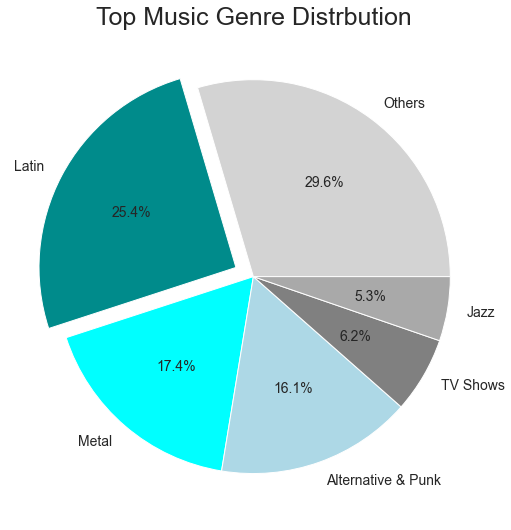

In [23]:
# top music genre by precentage excluding rock 
colors_= ['lightgrey', 'darkcyan','cyan', 'lightblue','grey', 'darkgrey']
plt.figure(figsize=(30, 20))

plt.subplot(131)
plt.pie(df1.total_genre_income, labels= df1.above_avg_genres, autopct = '%1.1f%%',  explode = (0, 0.1, 0, 0,0,0), colors= colors_, textprops={'fontsize': 14})
plt.title('Top Music Genre Distrbution', fontsize = '25')


plt.show()

In [24]:
# Separting every genre into a different data frame (for the legend)
Latin = df2[df2['Genre'] == 'Latin']
Punk = df2[df2['Genre'] == 'Alternative & Punk']
Metal = df2[df2['Genre'] == 'Metal']
Shows = df2[df2['Genre'] == 'TV Shows']
Drama = df2[df2['Genre'] == 'Drama']
Sci = df2[df2['Genre'] == 'Sci Fi & Fantasy']
Classical = df2[df2['Genre'] == 'Classical']

# first five rows of query2 results
df2.head()

,BillingCountry,Genre,track_earning,count_
0,USA,Latin,90.09,91
1,Canada,Latin,59.40,60
2,Brazil,Latin,52.47,53
3,France,Alternative & Punk,30.69,31
4,United Kingdom,Latin,30.69,31


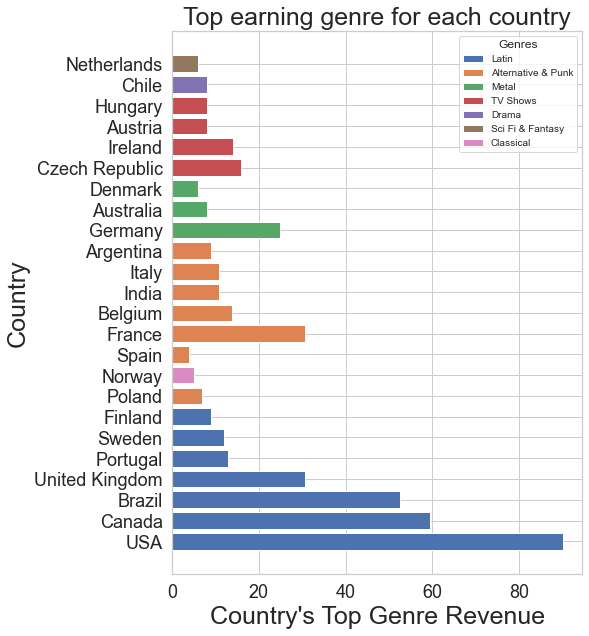

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 10))

plt.subplot(131)
plt.barh(Latin.BillingCountry, Latin.track_earning, label= 'Latin')
plt.barh(Punk.BillingCountry, Punk.track_earning, label= 'Alternative & Punk')
plt.barh(Metal.BillingCountry, Metal.track_earning, label= 'Metal')
plt.barh(Shows.BillingCountry, Shows.track_earning, label= 'TV Shows')
plt.barh(Drama.BillingCountry, Drama.track_earning, label= 'Drama')
plt.barh(Sci.BillingCountry, Sci.track_earning, label= 'Sci Fi & Fantasy')
plt.barh(Classical.BillingCountry, Classical.track_earning, label= 'Classical')

plt.title('Top earning genre for each country', fontsize= 25)

plt.xlabel("Country's Top Genre Revenue", fontsize= '25')
plt.ylabel('Country', fontsize= '25')

plt.xticks(fontsize=18, rotation= 0)
plt.yticks(fontsize=18, rotation= 0)

plt.legend(title ='Genres' ,loc=1, prop={'size': 10})

plt.show()

In [16]:
rock = df3[df3['Genre'] == 'Rock']
metal =df3[df3['Genre'] == 'Metal']
latin = df3[df3['Genre'] == 'Latin']
punk = df3[df3['Genre'] == 'Alternative & Punk']

df3.head()

,month_of_year,Genre,Genre_revenue
0,2009-01,Rock,99.99
1,2009-01,Metal,87.12
2,2009-01,Latin,28.71
3,2009-01,Alternative & Punk,55.44
4,2009-02,Rock,97.02


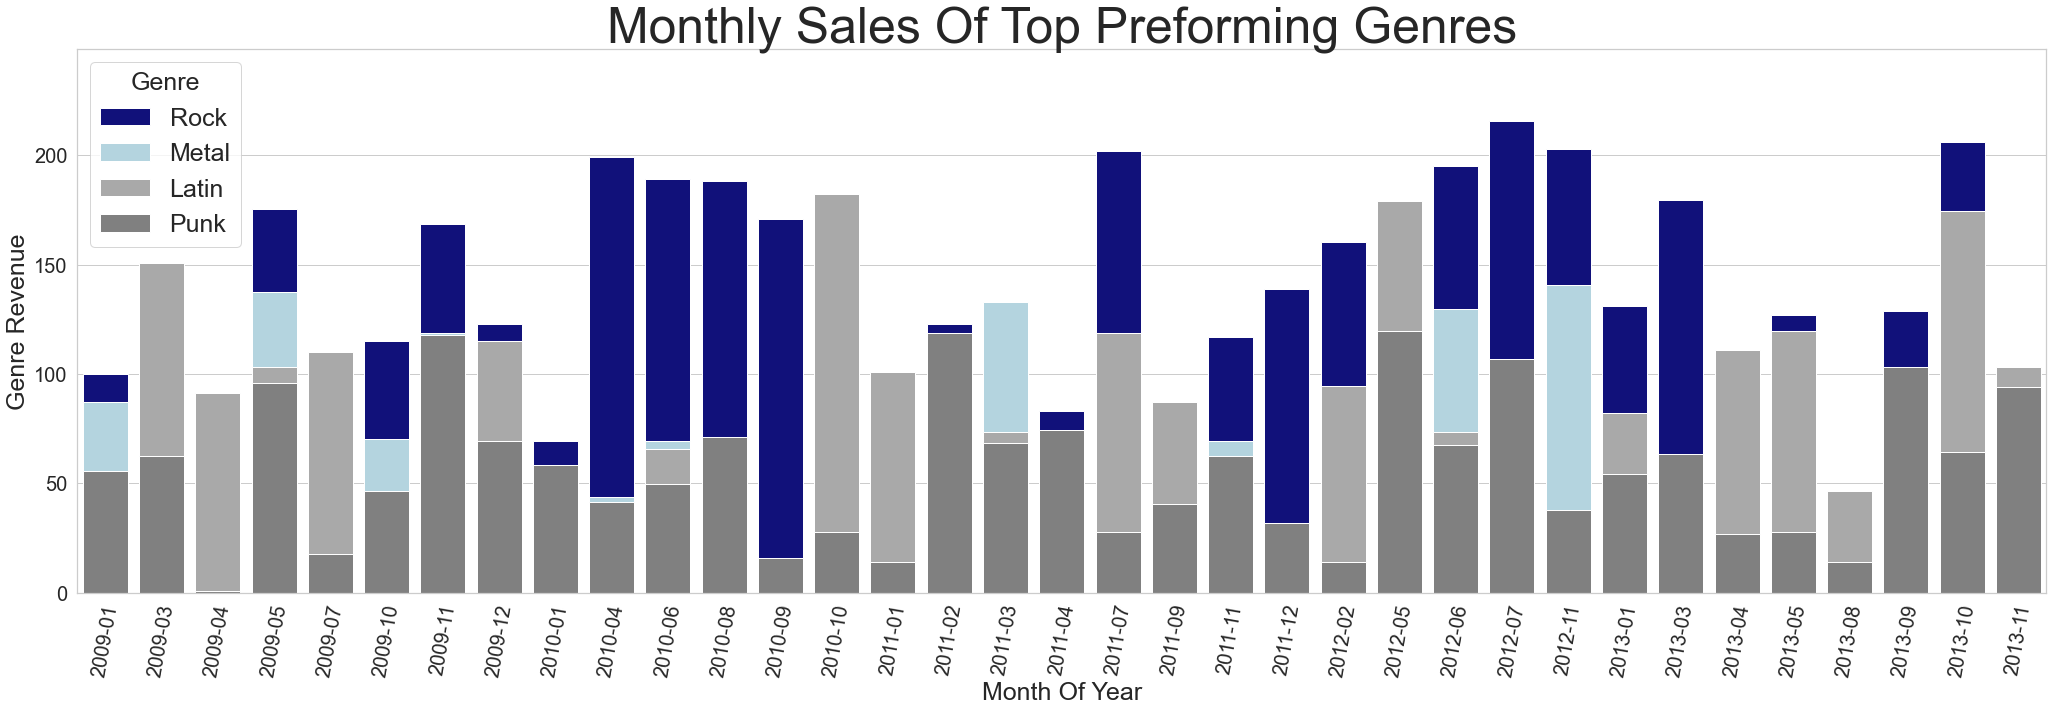

In [17]:
plt.figure(figsize=(120, 10))

plt.subplot(131)

sns.barplot(data= rock , x= 'month_of_year',y ='Genre_revenue', color= 'darkblue', label= 'Rock' )
sns.barplot(data= metal, x= 'month_of_year',y ='Genre_revenue', color= 'lightblue', label= 'Metal' )
sns.barplot(data= latin, x= 'month_of_year',y ='Genre_revenue', color= 'darkgrey', label= 'Latin')
sns.barplot(data= punk, x= 'month_of_year',y ='Genre_revenue', color= 'grey', label= 'Punk' ).tick_params(rotation = 70)

plt.title('Monthly Sales Of Top Preforming Genres', fontsize= 50)

plt.xlabel('Month Of Year', fontsize= '25')
plt.ylabel('Genre Revenue', fontsize= '25')

plt.xticks(fontsize=20, rotation=80)
plt.yticks(fontsize=20, rotation=0)


legend = plt.legend(title ='Genre',fontsize='large' , loc=2, prop={'size': 25})
plt.setp(legend.get_title(),fontsize='25')

plt.show()

In [18]:
df4.head()

,billingCountry,artist_name,artist_total_usd,count_
0,USA,The Office,33.83,17
1,Australia,Iron Maiden,17.82,18
2,Czech Republic,Lost,15.92,8
3,Ireland,Lost,15.92,8
4,Canada,Os Paralamas Do Sucesso,15.84,16


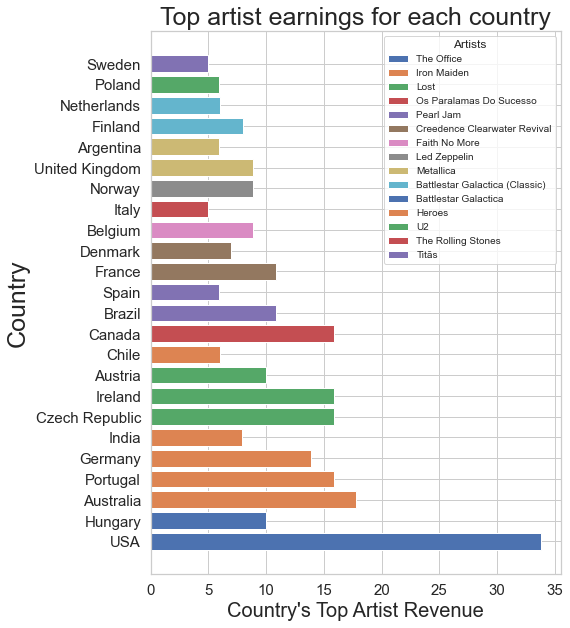

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 10))

for artist_name in df4.artist_name.unique():
    plot_ = df4[df4['artist_name']== artist_name]
    
    plt.subplot(131)
    plt.barh(plot_.billingCountry, plot_.artist_total_usd, label= f'{artist_name}')

plt.title('Top artist earnings for each country', fontsize= 25)

plt.xlabel("Country's Top Artist Revenue", fontsize= '20')
plt.ylabel('Country', fontsize= '25')

plt.xticks(fontsize=15, rotation= 0)
plt.yticks(fontsize=15, rotation= 0)

plt.legend(title ='Artists', loc=1, prop={'size': 10})

plt.show()